<a href="https://colab.research.google.com/github/Ajit-chaudhary-coder/Thesis/blob/main/Thesis_Cleand_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# # change directory
# import os
# os.chdir("/content/drive/MyDrive")

# try:
#   os.mkdir("Thesis ")
# except:
#   print('Folder Already Created')

# # Print out the current directory
# !pwd

Mounted at /content/drive


### 1

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Clear TensorFlow backend session to avoid reusing old models
tf.keras.backend.clear_session()
# Set Up MirroredStrategy for GPU parallelism
strategy = tf.distribute.MirroredStrategy()

In [4]:
# Load Dataset (assuming CSV with columns 'Content' and 'Category')
df = pd.read_csv('/content/drive/MyDrive/Thesis /Classification_Cleaned_One_Copy (1).csv')  # Replace with the actual path to your dataset
df = df.sample(n=10000, random_state=42)
df

,Content,Category
42939,पाकिस्तान दक्षिण अफ्रिकाविरुद्धको टेस्टको दिन ...,sports
47973,सरकारले मुनाफा आर्जन गर्नेगरी निजी क्षेत्रबाट ...,Education
50714,काठमाडौं गठबन्धन निकट विद्यार्थी संगठनहरूले आफ...,politics
68763,काठमाडौँ रञ्जिता श्रेष्ठलाई नागरिक उन्मुक्ति प...,politics
66927,विराटनगर आयोजकले विवादास्पद ‘वान एक्स ब्याट’को...,sports
...,...,...
59685,नुवाकोट संस्कृति पर्यटन नागरिक उड्डयनमन्त्री ह...,politics
54470,नेकपा माओवादी केन्द्रले टिप्पणीसहित एमसिसी पास...,politics
19742,कोरोना भाइरस महामारीसँग जुधिरहेका युरोपेली मुल...,World
27578,एजेन्सी पाकिस्तानी सेना प्रमुख असिम मुनीरले मत...,World


In [5]:
nan_values = df.isna().sum()
nan_values

,0
Content,0
Category,0


In [6]:
# Remove rows with NaN values
df = df.dropna()

In [ ]:
''' # Check for NaN values in the DataFrame
# Remove rows with NaN values
df = df.dropna()
# Check again for NaN values
nan_values_after = df.isna().sum()
print("\nNaN values after removing rows:")
print(nan_values_after)
# Save the cleaned data to a CSV file
df.to_csv('/content/drive/MyDrive/Thesis/9_Dataset.csv', index=False)

 '''

' # Check for NaN values in the DataFrame\n# Remove rows with NaN values\ndf = df.dropna()\n# Check again for NaN values\nnan_values_after = df.isna().sum()\nprint("\nNaN values after removing rows:")\nprint(nan_values_after)\n# Save the cleaned data to a CSV file\ndf.to_csv(\'/content/drive/MyDrive/Thesis/9_Dataset.csv\', index=False)\n\n '

In [7]:
# Label Encoding
label_encoder = LabelEncoder()
df['Encoded_Category'] = label_encoder.fit_transform(df['Category'])
print("\nCategory Labels Mapping:")
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(category_mapping)
# Get encoded labels from the 'Encoded_Category' column of the DataFrame
encoded_labels = df['Encoded_Category'].values
num_classes = len(np.unique(encoded_labels))


Category Labels Mapping:
{'Education': 0, 'World': 1, 'economy': 2, 'entertainment': 3, 'health': 4, 'opinion': 5, 'politics': 6, 'society': 7, 'sports': 8}


In [8]:
# Define features (texts) and encoded labels
texts = df['Content'].tolist()  # Extract text data
labels = df['Encoded_Category'].tolist()  # Extract encoded labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels)

# Convert splits into DataFrames
train_df = pd.DataFrame({'Content': X_train, 'Label': y_train})
test_df = pd.DataFrame({'Content': X_test, 'Label': y_test})

# Print sizes of the resulting datasets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# # Optional: Print the first few rows of each set to verify
# print("\nSample Training Data:")
# print(X_train[:5])
# print("\nSample Testing Data:")
# print(X_test[:5])


Training set size: 8000
Testing set size: 2000


In [9]:
from transformers import BertTokenizer
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased',  from_pt=True)
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased', from_pt=True)

# Tokenization function
def tokenize_and_pad(texts, tokenizer, max_len=512):
    tokenized = tokenizer(
        texts,
        max_length=max_len,
        padding='max_length',  # Pad to max length
        truncation=True,       # Truncate sequences longer than max_len
        return_tensors='tf'    # Return TensorFlow tensors
    )
    return tokenized['input_ids'], tokenized['attention_mask']

# Tokenize and pad datasets
train_input_ids, train_attention_masks = tokenize_and_pad(train_df['Content'].tolist(), tokenizer)
test_input_ids, test_attention_masks = tokenize_and_pad(test_df['Content'].tolist(), tokenizer)

# Convert labels to tensors
train_labels = tf.convert_to_tensor(train_df['Label'].tolist())
test_labels = tf.convert_to_tensor(test_df['Label'].tolist())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

In [10]:
# Define batch size
batch_size = 5

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": train_input_ids, "attention_mask": train_attention_masks}, train_labels)
).shuffle(len(train_input_ids)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices(
    ({"input_ids": test_input_ids, "attention_mask": test_attention_masks}, test_labels)
).batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [11]:
# BertLayer to Extract Contextual Word Embeddings
class BertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertEmbeddingLayer, self).__init__(**kwargs)
        # Use the entire BERT model to get contextual embeddings
        self.bert_model = bert_model
        self.bert_model.trainable = False  # Freeze the BERT model weights

    def call(self, inputs):
        input_ids, attention_mask = inputs
        # Pass through the entire BERT model to get contextual embeddings
        outputs = self.bert_model(input_ids, attention_mask=attention_mask)
        # Extract the last hidden state (contextual embeddings)
        last_hidden_state = outputs.last_hidden_state
        return last_hidden_state


### +++++

### Model

In [12]:
# Build Model
# Pass the Contextual Word Embeddings to the CNN-BiLSTM Model
def build_cnn_bilstm_model_with_bert_embeddings(bert_model, num_classes):
    input_ids = tf.keras.Input(shape=(512,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.Input(shape=(512,), dtype=tf.int32, name='attention_mask')

    # Use BertEmbeddingLayer to get contextual embeddings
    bert_embeddings = BertEmbeddingLayer(bert_model)([input_ids, attention_mask])
     # **1. Dropout after BERT Embeddings**
    # bert_embeddings = tf.keras.layers.Dropout(0.3)(bert_embeddings)

    # CNN Layer
    # cnn1 = tf.keras.layers.Conv1D(filters=128, kernel_size=7, activation='relu', padding='same')(bert_embeddings)
    cnn2 = tf.keras.layers.Conv1D(filters=256, kernel_size=6, activation='relu', padding='same')(bert_embeddings)
    cnn3 = tf.keras.layers.Conv1D(filters=256, kernel_size=4, activation='relu', padding='same')(bert_embeddings)
    # Concatenate outputs from different kernel sizes
    cnn_concat = tf.keras.layers.Concatenate()([cnn2,cnn3])
    # Add Dropout layer
    # cnn_concat = tf.keras.layers.Dropout(0.2)(cnn_concat)

    # BiLSTM Layer
    lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(cnn_concat)
    lstm = tf.keras.layers.Dropout(0.2)(lstm)
    # lstm = tf.keras.layers.MaxPooling1D(pool_size=2)(lstm)
    pooled_output = tf.keras.layers.GlobalMaxPooling1D()(lstm)
    # Add Average MaxPooling layer
    # pooled_output = tf.keras.layers.GlobalAveragePooling1D()(lstm)

    # Dense Layers
    dense = tf.keras.layers.Dense(128, activation='relu')(pooled_output)
    # dense = tf.keras.layers.Dropout(0.1)(dense)         # Add Dropout
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(dense)

    # Build the model
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

    return model


In [13]:
# Use strategy.scope() for distributed training if needed
strategy = tf.distribute.get_strategy()
with strategy.scope():
    # Build and compile the model within the strategy scope
    model =build_cnn_bilstm_model_with_bert_embeddings(bert_model, num_classes)
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])



In [14]:
# Train the Model
# # apply early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # Train the model
history = model.fit(train_dataset, epochs=15, validation_data=test_dataset,callbacks=[early_stopping])
# history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

# Predictions and true labels
y_pred = model.predict(test_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)

# Evaluate the Model using the Dataset
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/15
1600/1600 [==============================] - 565s 341ms/step - loss: 1.6123 - accuracy: 0.5002 - val_loss: 1.1538 - val_accuracy: 0.6965
Epoch 2/15
1600/1600 [==============================] - 594s 371ms/step - loss: 0.9084 - accuracy: 0.7327 - val_loss: 0.8336 - val_accuracy: 0.7640
Epoch 3/15
1600/1600 [==============================] - 542s 339ms/step - loss: 0.7232 - accuracy: 0.7779 - val_loss: 0.7301 - val_accuracy: 0.7750
Epoch 4/15
1600/1600 [==============================] - 542s 339ms/step - loss: 0.6521 - accuracy: 0.7999 - val_loss: 0.6728 - val_accuracy: 0.7985
Epoch 5/15
1600/1600 [==============================] - 542s 338ms/step - loss: 0.6049 - accuracy: 0.8144 - val_loss: 0.6638 - val_accuracy: 0.7935
Epoch 6/15
1600/1600 [==============================] - 541s 338ms/step - loss: 0.5697 - accuracy: 0.8240 - val_loss: 0.6128 - val_accuracy: 0.8135
Epoch 7/15
1600/1600 [==============================] - 541s 338ms/step - loss: 0.5378 - accuracy: 0.8309 - val_

### Visualization

In [15]:
# model symmary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_embedding_layer (Bert  (None, 512, 768)             1778534   ['input_ids[0][0]',           
 EmbeddingLayer)                                          40         'attention_mask[0][0]']      
                                                                                              

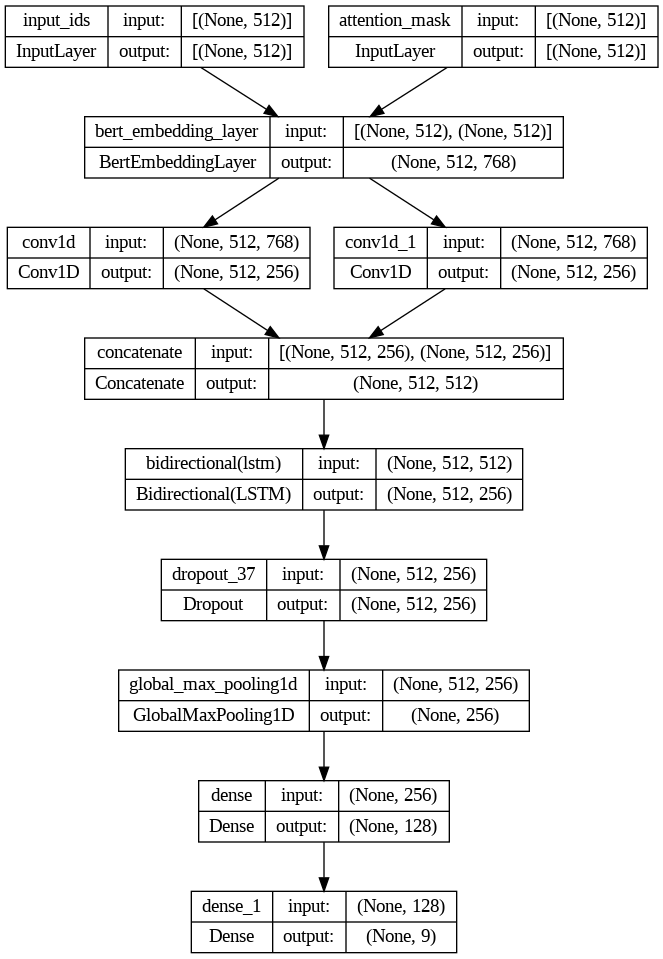

In [16]:
# Plot the model architecture and save to the specified file
tf.keras.utils.plot_model(model, to_file='BER-BiLSTM-CNN_model_architecture.png', show_shapes=True, show_layer_names=True)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize # import the label_binarize function


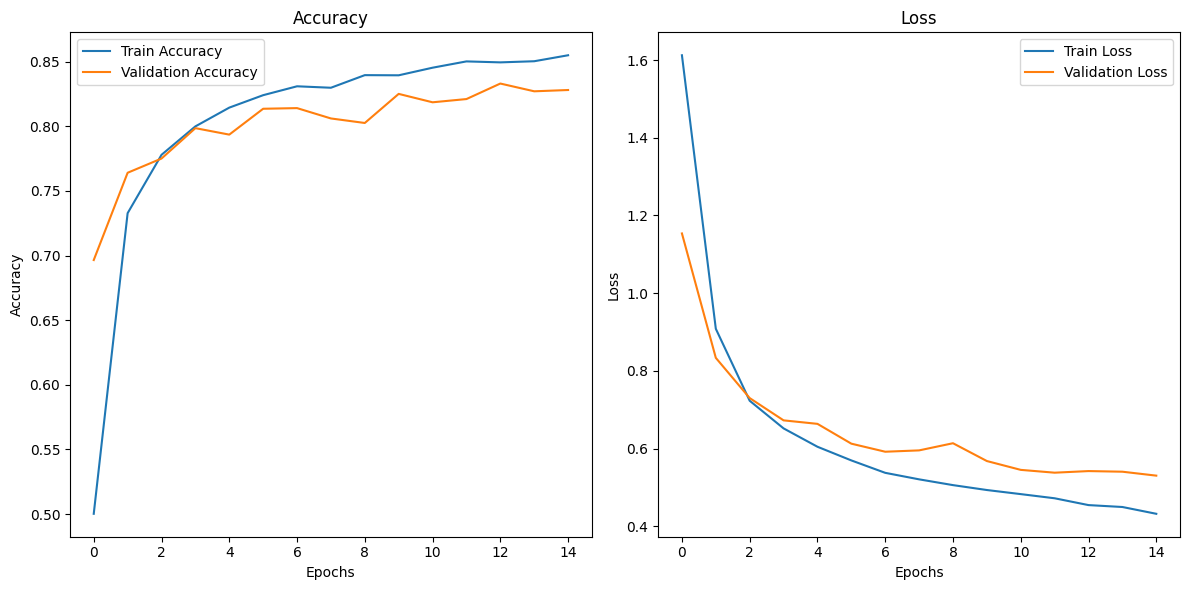

In [18]:
# Plot accuracy and loss curves
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


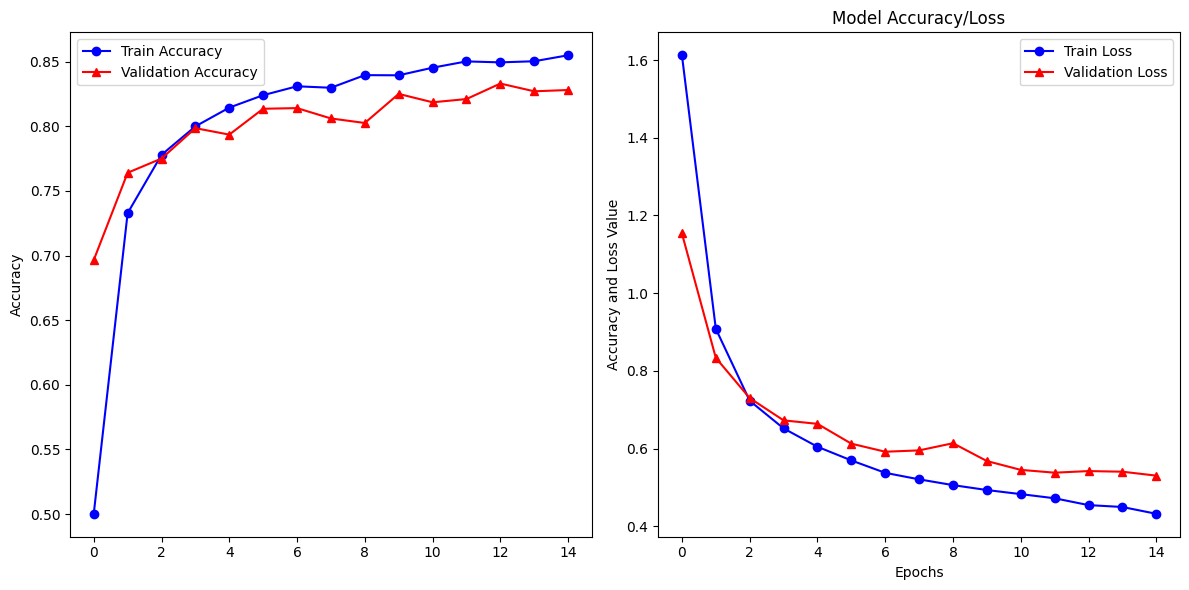

In [27]:
# Plot accuracy and loss curves
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'],'bo-', label='Train Accuracy')
    plt.plot(history.history['val_accuracy'],'r^-', label='Validation Accuracy')
    # plt.title('Accuracy')
    # plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'],'bo-',label='Train Loss')
    plt.plot(history.history['val_loss'], 'r^-',label='Validation Loss')
    plt.title('Model Accuracy/Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


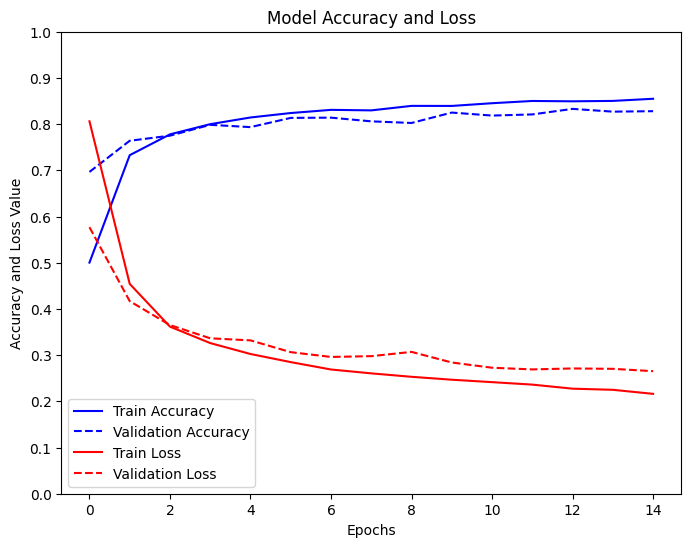

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_history_without_scaling_label(history, loss_scale_factor=1):
    # Create a single plot for both Accuracy and Scaled Loss
    plt.figure(figsize=(8, 6))

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')

    # Scale the loss values
    scaled_train_loss = [loss * loss_scale_factor for loss in history.history['loss']]
    scaled_val_loss = [loss * loss_scale_factor for loss in history.history['val_loss']]

    # Plot scaled loss without mentioning the scaling factor
    plt.plot(scaled_train_loss, label='Train Loss', color='red')
    plt.plot(scaled_val_loss, label='Validation Loss', color='red', linestyle='--')

    # Add title, labels, and legend
    plt.title('Model Accuracy and Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss Value')
    plt.legend()

    # Adjust y-axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1.0 in steps of 0.1

    # Display the plot
    plt.show()

# Call the function without showing "scaled by 0.5"
plot_training_history_without_scaling_label(history, loss_scale_factor=0.5)


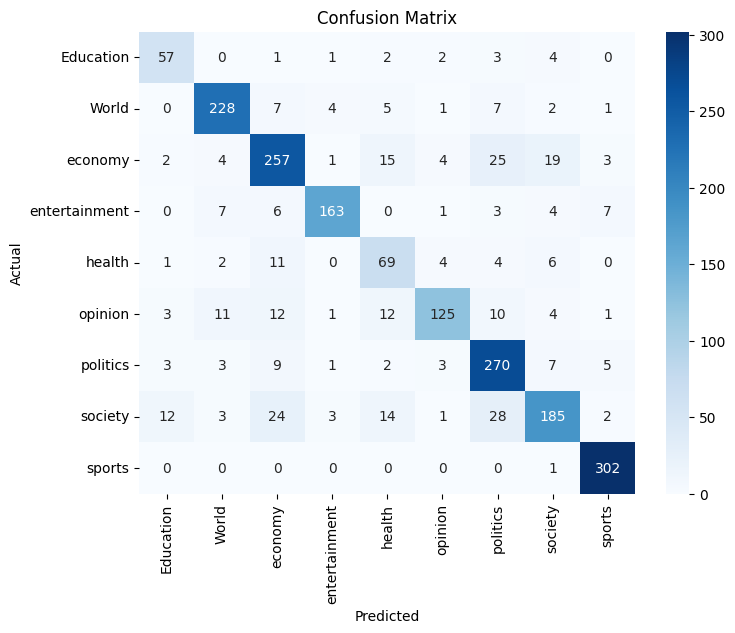

               precision    recall  f1-score   support

    Education       0.73      0.81      0.77        70
        World       0.88      0.89      0.89       255
      economy       0.79      0.78      0.78       330
entertainment       0.94      0.85      0.89       191
       health       0.58      0.71      0.64        97
      opinion       0.89      0.70      0.78       179
     politics       0.77      0.89      0.83       303
      society       0.80      0.68      0.73       272
       sports       0.94      1.00      0.97       303

     accuracy                           0.83      2000
    macro avg       0.81      0.81      0.81      2000
 weighted avg       0.83      0.83      0.83      2000



In [21]:
# Predictions and true labels
# y_pred = model.predict(test_dataset)
# y_pred_labels = np.argmax(y_pred, axis=1)

# Get unique labels in y_test and y_pred_labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_labels)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_[unique_labels].astype(str), # Use unique labels for target names
            yticklabels=label_encoder.classes_[unique_labels].astype(str))  # Use unique labels for target names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_[unique_labels].astype(str), labels=unique_labels)) # Add labels argument

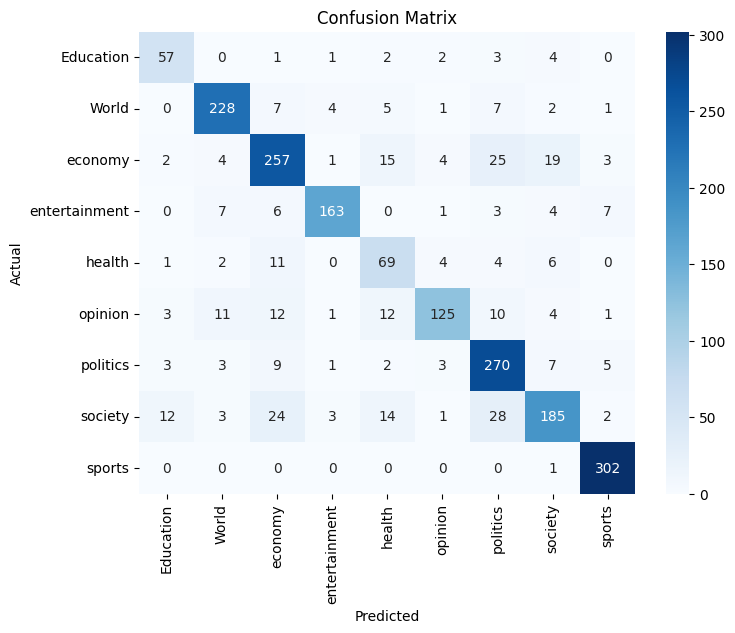

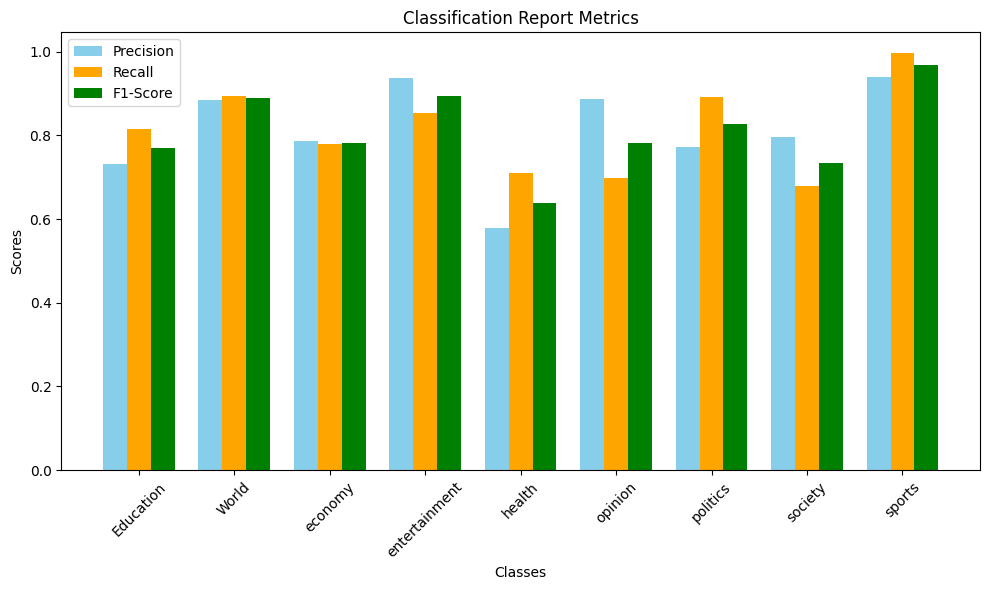

               precision    recall  f1-score   support

    Education       0.73      0.81      0.77        70
        World       0.88      0.89      0.89       255
      economy       0.79      0.78      0.78       330
entertainment       0.94      0.85      0.89       191
       health       0.58      0.71      0.64        97
      opinion       0.89      0.70      0.78       179
     politics       0.77      0.89      0.83       303
      society       0.80      0.68      0.73       272
       sports       0.94      1.00      0.97       303

     accuracy                           0.83      2000
    macro avg       0.81      0.81      0.81      2000
 weighted avg       0.83      0.83      0.83      2000



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predictions and true labels
# y_pred = model.predict(test_dataset)
# y_pred_labels = np.argmax(y_pred, axis=1)

# Get unique labels in y_test and y_pred_labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_labels)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_[unique_labels].astype(str), # Use unique labels for target names
            yticklabels=label_encoder.classes_[unique_labels].astype(str))  # Use unique labels for target names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(
    y_test, y_pred_labels,
    target_names=label_encoder.classes_[unique_labels].astype(str),
    labels=unique_labels,
    output_dict=True  # Get the report as a dictionary
)

# Extract metrics for each class
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[cls]['precision'] for cls in class_names]
recall = [report[cls]['recall'] for cls in class_names]
f1_score = [report[cls]['f1-score'] for cls in class_names]

# Create a bar plot for Precision, Recall, and F1-Score
x = np.arange(len(class_names))  # Label positions
width = 0.25  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print the classification report
print(classification_report(
    y_test, y_pred_labels,
    target_names=label_encoder.classes_[unique_labels].astype(str),
    labels=unique_labels
))


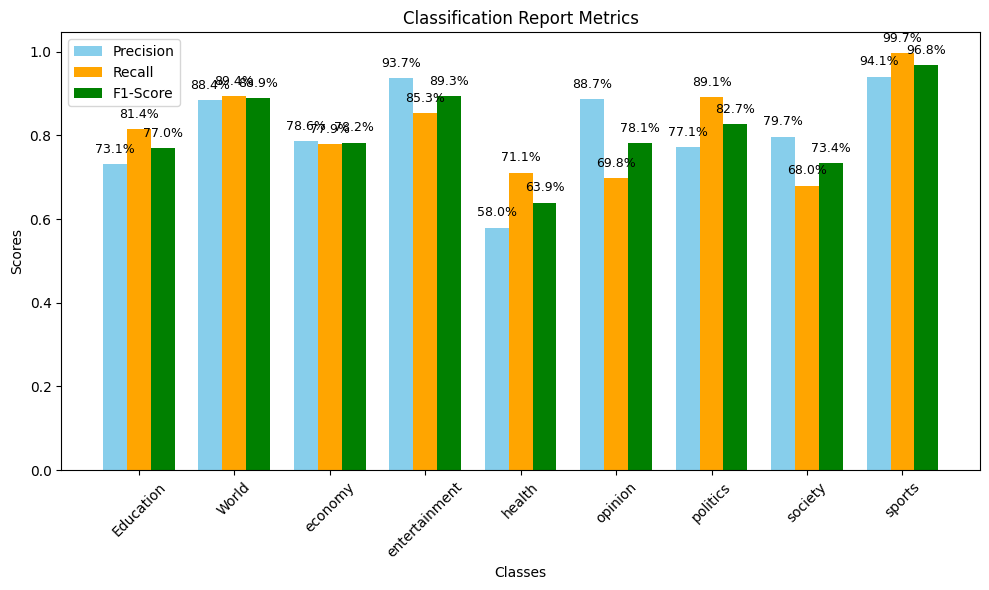

In [23]:
# Create a bar plot for Precision, Recall, and F1-Score
x = np.arange(len(class_names))  # Label positions
width = 0.25  # Bar width

plt.figure(figsize=(10, 6))
precision_bars = plt.bar(x - width, precision, width, label='Precision', color='skyblue')
recall_bars = plt.bar(x, recall, width, label='Recall', color='orange')
f1_score_bars = plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Add percentages on top of each bar
for bars, metric in zip([precision_bars, recall_bars, f1_score_bars], [precision, recall, f1_score]):
    for bar, value in zip(bars, metric):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,  # Position: center and slightly above the bar
                 f'{value:.1%}', ha='center', va='bottom', fontsize=9)  # Format as percentage

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


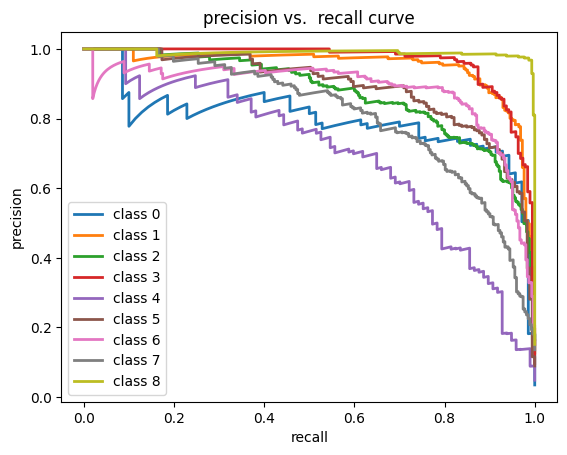

In [24]:
# Precision-Recall Curve for Multiclass Classification

# Iterate over each class
precision = dict()
recall = dict()
for i in range(num_classes): # num_classes is the number of classes in your dataset
    # Convert y_test to a NumPy array to ensure element-wise comparison
    y_test_array = np.array(y_test)
    precision[i], recall[i], _ = precision_recall_curve((y_test_array == i).astype(int), y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs.  recall curve")
plt.show()

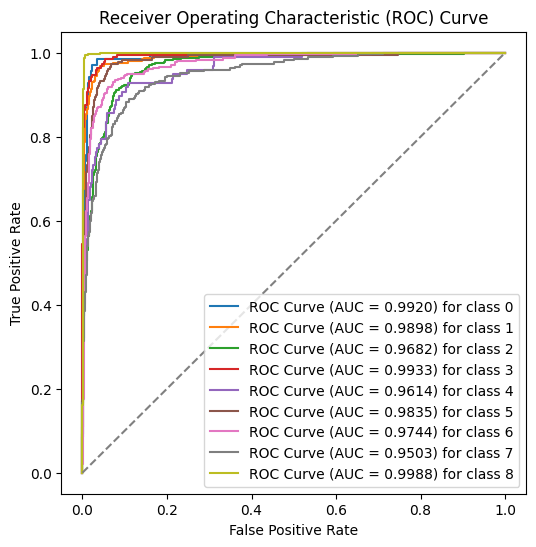

In [25]:
# ROC Curve for multiclass classification

# Binarize the output
y_test_binary = label_binarize(y_test, classes=range(num_classes)) # Change here

# Iterate over each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=plt.cm.tab10(i),
             label=f'ROC Curve (AUC = {roc_auc[i]:.4f}) for class {i}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Visualization +++

In [ ]:
# @title
# model symmary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_embedding_layer (Bert  (None, 512, 768)             1778534   ['input_ids[0][0]',           
 EmbeddingLayer)                                          40         'attention_mask[0][0]']      
                                                                                              

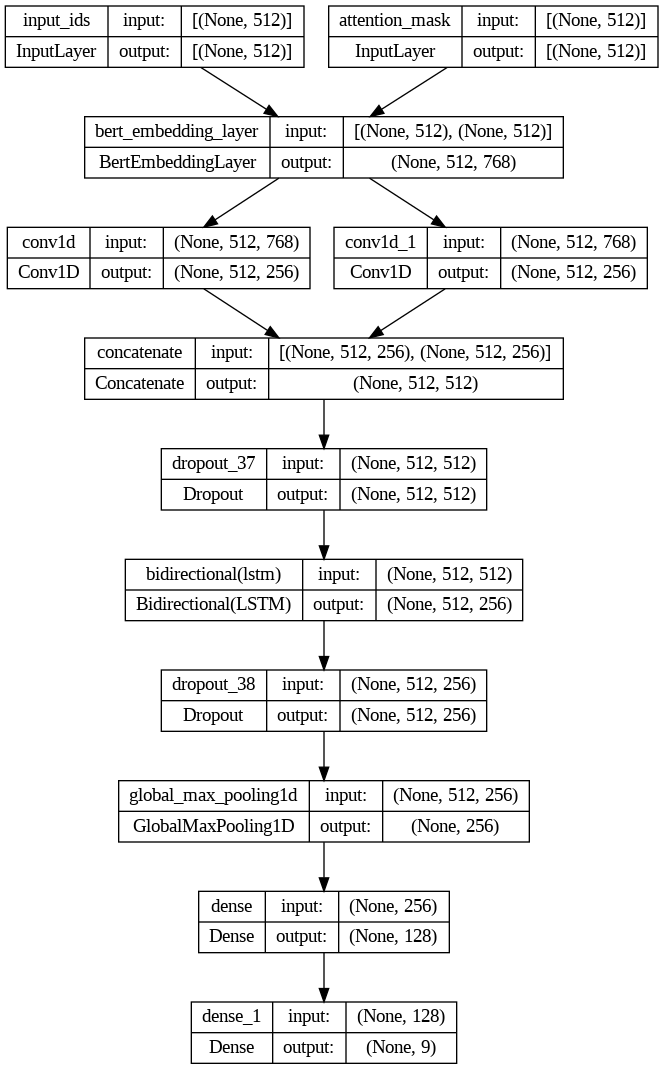

In [ ]:
# @title
# Plot the model architecture and save to the specified file
tf.keras.utils.plot_model(model, to_file='BER-BiLSTM-CNN_model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize # import the label_binarize function


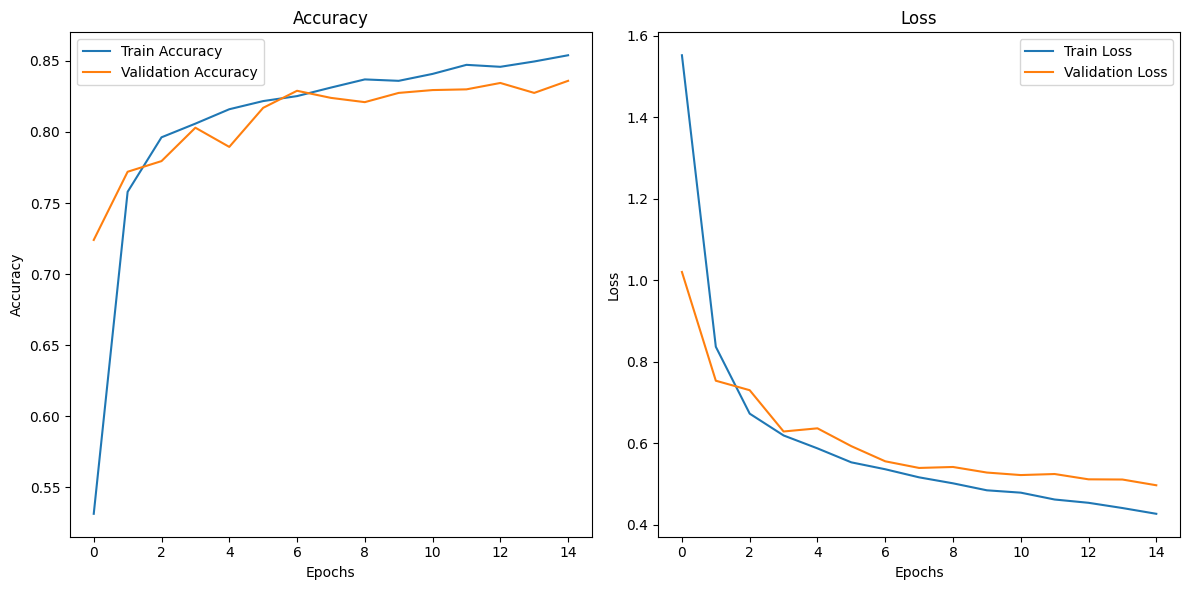

In [ ]:
# @title
# Plot accuracy and loss curves
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


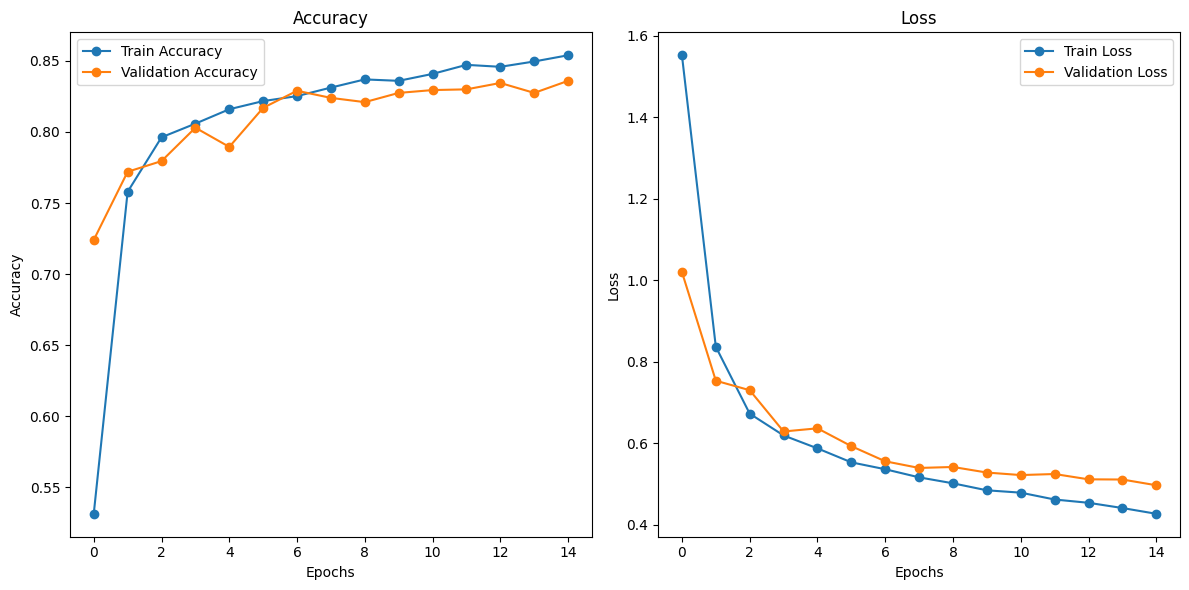

In [ ]:
# Plot accuracy and loss curves
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker ='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker ='o')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker ='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker ='o')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


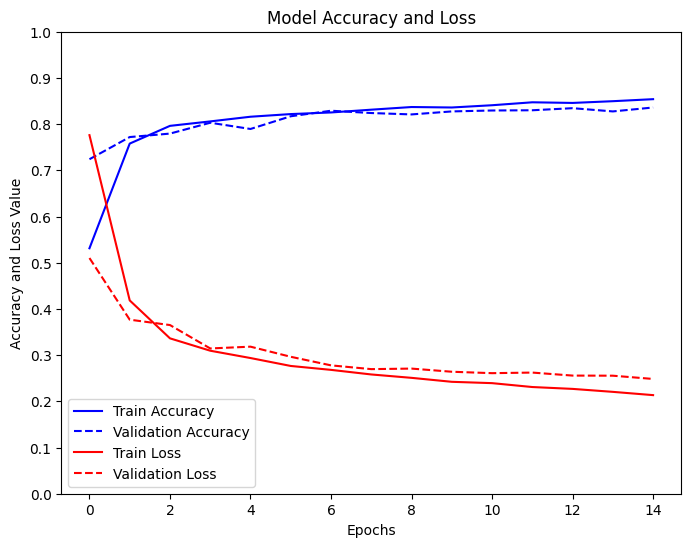

In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np

def plot_training_history_without_scaling_label(history, loss_scale_factor=1):
    # Create a single plot for both Accuracy and Scaled Loss
    plt.figure(figsize=(8, 6))

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')

    # Scale the loss values
    scaled_train_loss = [loss * loss_scale_factor for loss in history.history['loss']]
    scaled_val_loss = [loss * loss_scale_factor for loss in history.history['val_loss']]

    # Plot scaled loss without mentioning the scaling factor
    plt.plot(scaled_train_loss, label='Train Loss', color='red')
    plt.plot(scaled_val_loss, label='Validation Loss', color='red', linestyle='--')

    # Add title, labels, and legend
    plt.title('Model Accuracy and Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss Value')
    plt.legend()

    # Adjust y-axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1.0 in steps of 0.1

    # Display the plot
    plt.show()

# Call the function without showing "scaled by 0.5"
plot_training_history_without_scaling_label(history, loss_scale_factor=0.5)


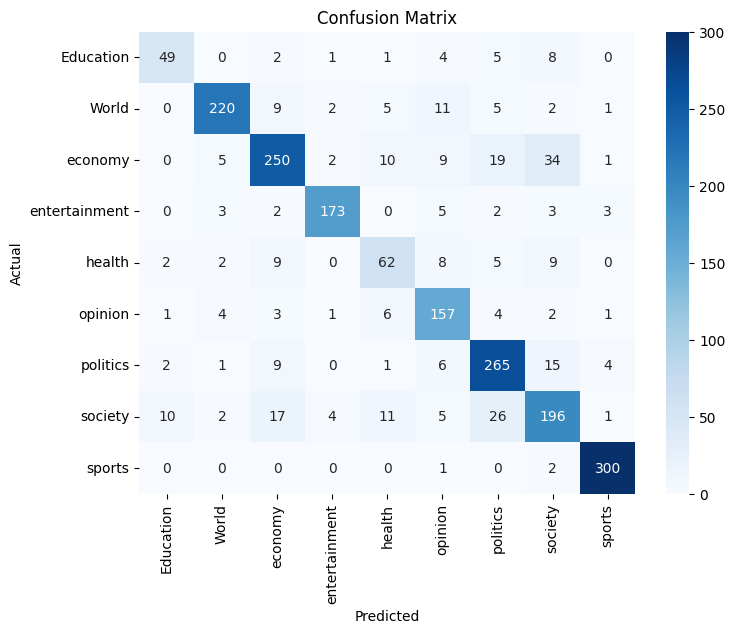

               precision    recall  f1-score   support

    Education       0.77      0.70      0.73        70
        World       0.93      0.86      0.89       255
      economy       0.83      0.76      0.79       330
entertainment       0.95      0.91      0.93       191
       health       0.65      0.64      0.64        97
      opinion       0.76      0.88      0.82       179
     politics       0.80      0.87      0.84       303
      society       0.72      0.72      0.72       272
       sports       0.96      0.99      0.98       303

     accuracy                           0.84      2000
    macro avg       0.82      0.81      0.82      2000
 weighted avg       0.84      0.84      0.84      2000



In [ ]:
# @title
# Predictions and true labels
# y_pred = model.predict(test_dataset)
# y_pred_labels = np.argmax(y_pred, axis=1)

# Get unique labels in y_test and y_pred_labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_labels)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_[unique_labels].astype(str), # Use unique labels for target names
            yticklabels=label_encoder.classes_[unique_labels].astype(str))  # Use unique labels for target names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_[unique_labels].astype(str), labels=unique_labels)) # Add labels argument

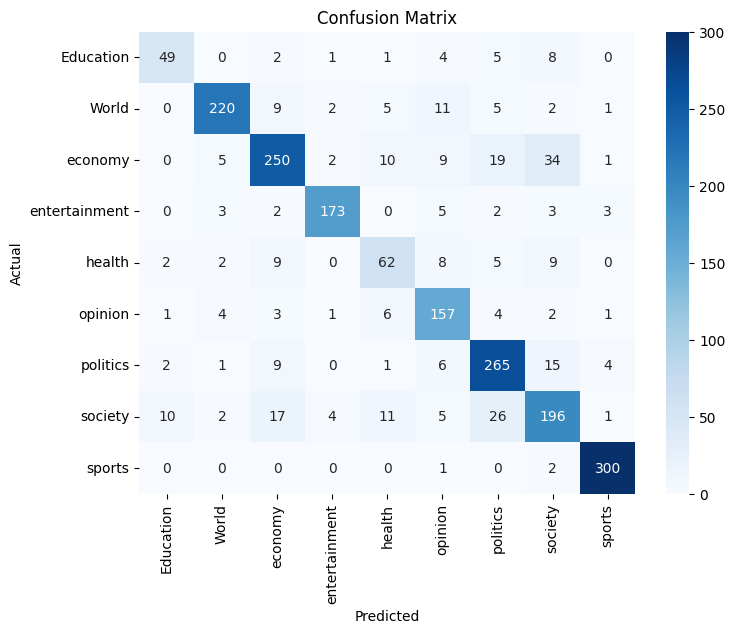

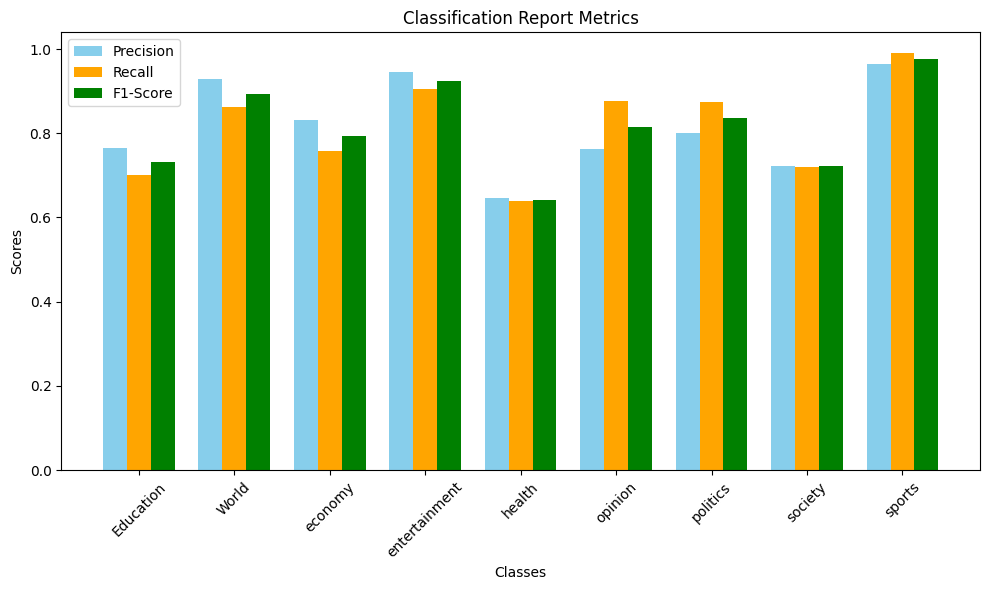

               precision    recall  f1-score   support

    Education       0.77      0.70      0.73        70
        World       0.93      0.86      0.89       255
      economy       0.83      0.76      0.79       330
entertainment       0.95      0.91      0.93       191
       health       0.65      0.64      0.64        97
      opinion       0.76      0.88      0.82       179
     politics       0.80      0.87      0.84       303
      society       0.72      0.72      0.72       272
       sports       0.96      0.99      0.98       303

     accuracy                           0.84      2000
    macro avg       0.82      0.81      0.82      2000
 weighted avg       0.84      0.84      0.84      2000



In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predictions and true labels
# y_pred = model.predict(test_dataset)
# y_pred_labels = np.argmax(y_pred, axis=1)

# Get unique labels in y_test and y_pred_labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_labels)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_[unique_labels].astype(str), # Use unique labels for target names
            yticklabels=label_encoder.classes_[unique_labels].astype(str))  # Use unique labels for target names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(
    y_test, y_pred_labels,
    target_names=label_encoder.classes_[unique_labels].astype(str),
    labels=unique_labels,
    output_dict=True  # Get the report as a dictionary
)

# Extract metrics for each class
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[cls]['precision'] for cls in class_names]
recall = [report[cls]['recall'] for cls in class_names]
f1_score = [report[cls]['f1-score'] for cls in class_names]

# Create a bar plot for Precision, Recall, and F1-Score
x = np.arange(len(class_names))  # Label positions
width = 0.25  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print the classification report
print(classification_report(
    y_test, y_pred_labels,
    target_names=label_encoder.classes_[unique_labels].astype(str),
    labels=unique_labels
))


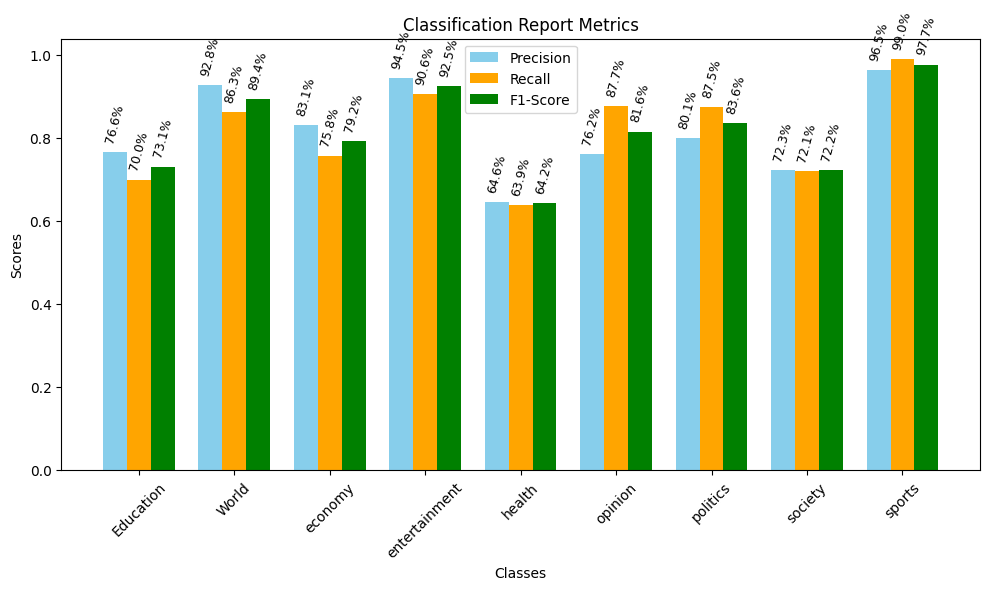

In [ ]:
# @title
# Create a bar plot for Precision, Recall, and F1-Score
x = np.arange(len(class_names))  # Label positions
width = 0.25  # Bar width

plt.figure(figsize=(10, 6))
precision_bars = plt.bar(x - width, precision, width, label='Precision', color='skyblue')
recall_bars = plt.bar(x, recall, width, label='Recall', color='orange')
f1_score_bars = plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Add percentages on top of each bar
for bars, metric in zip([precision_bars, recall_bars, f1_score_bars], [precision, recall, f1_score]):
    for bar, value in zip(bars, metric):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,  # Position: center and slightly above the bar
                 f'{value:.1%}', ha='center', va='bottom', fontsize=9, rotation=75)  # Format as percentage

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


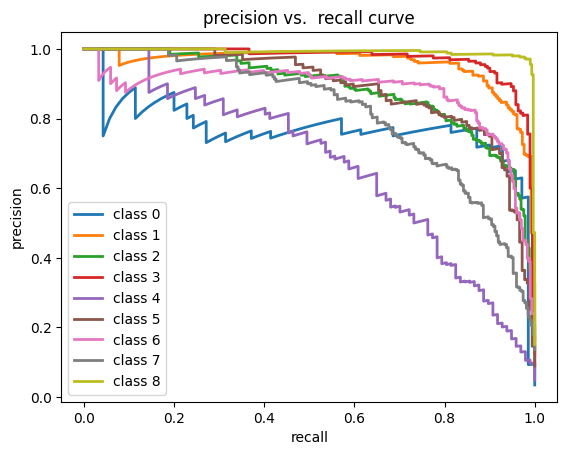

In [ ]:
# @title
# Precision-Recall Curve for Multiclass Classification

# Iterate over each class
precision = dict()
recall = dict()
for i in range(num_classes): # num_classes is the number of classes in your dataset
    # Convert y_test to a NumPy array to ensure element-wise comparison
    y_test_array = np.array(y_test)
    precision[i], recall[i], _ = precision_recall_curve((y_test_array == i).astype(int), y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs.  recall curve")
plt.show()

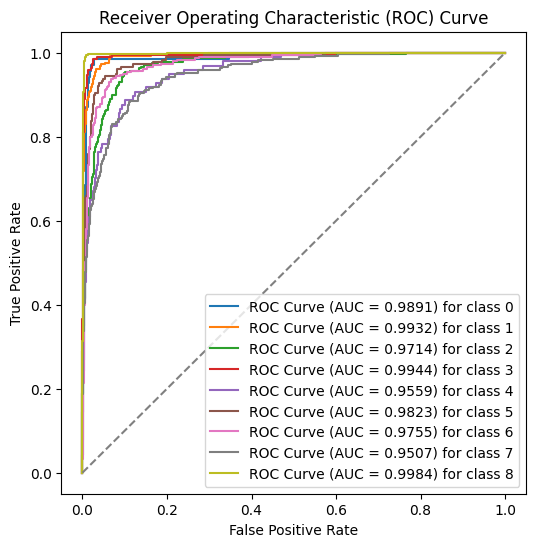

In [ ]:
# @title
# ROC Curve for multiclass classification

# Binarize the output
y_test_binary = label_binarize(y_test, classes=range(num_classes)) # Change here

# Iterate over each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=plt.cm.tab10(i),
             label=f'ROC Curve (AUC = {roc_auc[i]:.4f}) for class {i}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

200/200 [==============================] - 89s 446ms/step


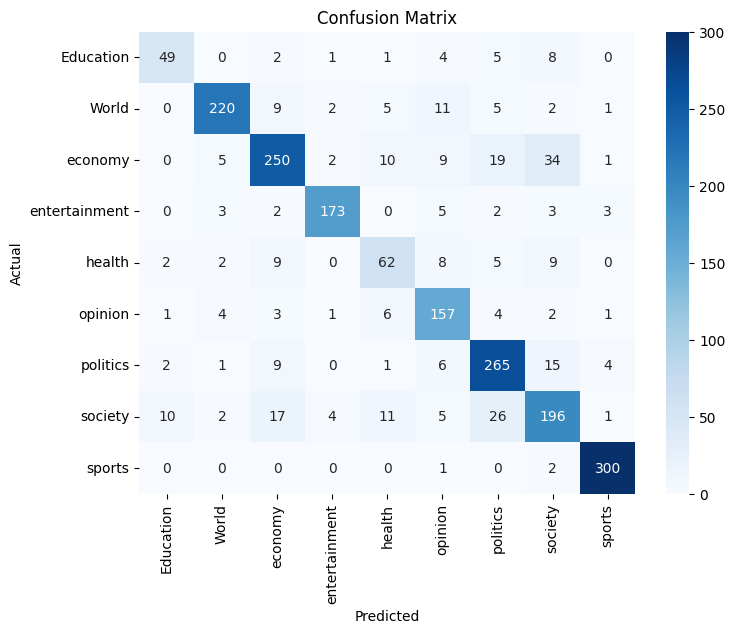

               precision    recall  f1-score   support

    Education       0.77      0.70      0.73        70
        World       0.93      0.86      0.89       255
      economy       0.83      0.76      0.79       330
entertainment       0.95      0.91      0.93       191
       health       0.65      0.64      0.64        97
      opinion       0.76      0.88      0.82       179
     politics       0.80      0.87      0.84       303
      society       0.72      0.72      0.72       272
       sports       0.96      0.99      0.98       303

     accuracy                           0.84      2000
    macro avg       0.82      0.81      0.82      2000
 weighted avg       0.84      0.84      0.84      2000


Per-Class Accuracy:
Education: 0.7000
World: 0.8627
economy: 0.7576
entertainment: 0.9058
health: 0.6392
opinion: 0.8771
politics: 0.8746
society: 0.7206
sports: 0.9901

Per-Class Loss:
Education: 0.8190
World: 0.3908
economy: 0.6767
entertainment: 0.3016
health: 1.0511
opinion: 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predicted probabilities (assuming softmax activation in the last layer)
y_pred_probs = model.predict(test_dataset)

# Get predicted labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Get unique labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_labels)))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_[unique_labels].astype(str),
            yticklabels=label_encoder.classes_[unique_labels].astype(str))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_[unique_labels].astype(str), labels=unique_labels))

# Calculate Per-Class Accuracy
class_accuracies = {}
for i, label in enumerate(unique_labels):
    true_positives = conf_matrix[i, i]
    total_actual = np.sum(conf_matrix[i, :])  # Sum of actual occurrences of this class
    class_accuracies[label] = true_positives / total_actual if total_actual > 0 else 0

print("\nPer-Class Accuracy:")
for label, acc in class_accuracies.items():
    print(f"{label_encoder.classes_[label]}: {acc:.4f}")

# Calculate Per-Class Loss (Categorical Cross-Entropy)
import tensorflow as tf

y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
loss_fn = tf.keras.losses.CategoricalCrossentropy()

class_losses = {}
for i, label in enumerate(unique_labels):
    mask = y_test == label  # Select samples for this class
    if np.sum(mask) > 0:
        loss = loss_fn(y_test_one_hot[mask], y_pred_probs[mask]).numpy()
        class_losses[label] = loss

print("\nPer-Class Loss:")
for label, loss in class_losses.items():
    print(f"{label_encoder.classes_[label]}: {loss:.4f}")


### Visualization

In [ ]:
# model symmary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_embedding_layer (Bert  (None, 512, 768)             1673564   ['input_ids[0][0]',           
 EmbeddingLayer)                                          16         'attention_mask[0][0]']      
                                                                                              

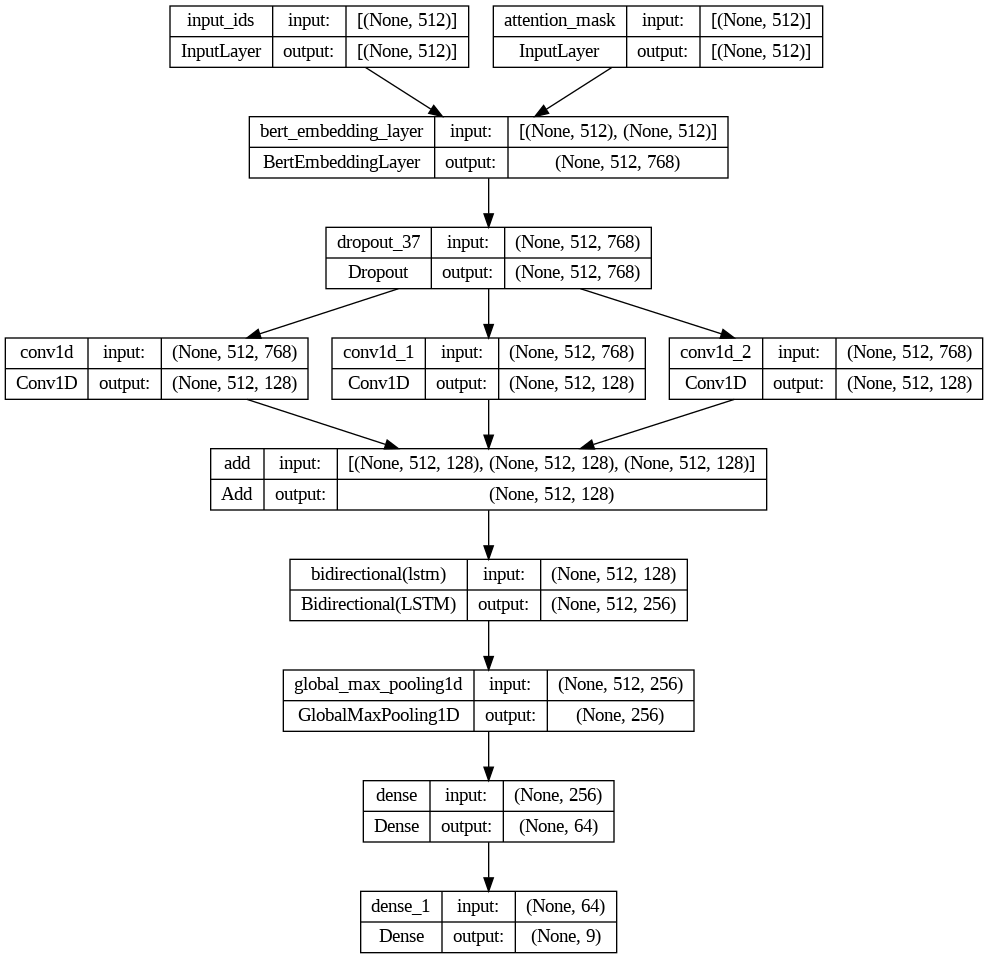

In [ ]:
# Plot the model architecture and save to the specified file
tf.keras.utils.plot_model(model, to_file='BER-BiLSTM-CNN_model_architecture.png', show_shapes=True, show_layer_names=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize # import the label_binarize function


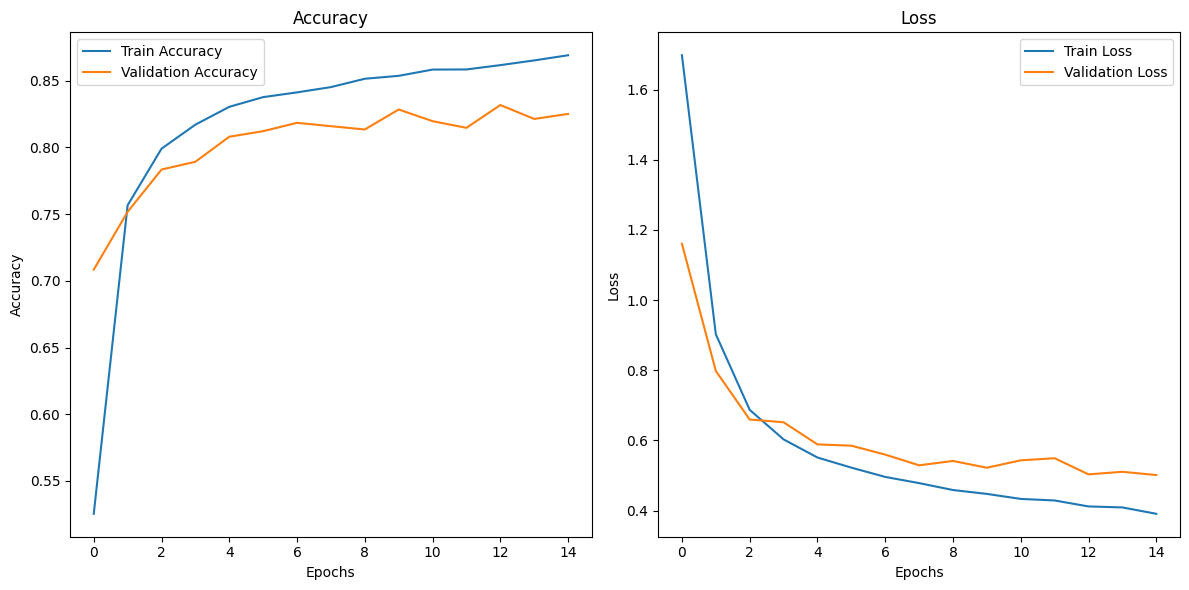

In [ ]:
# Plot accuracy and loss curves
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


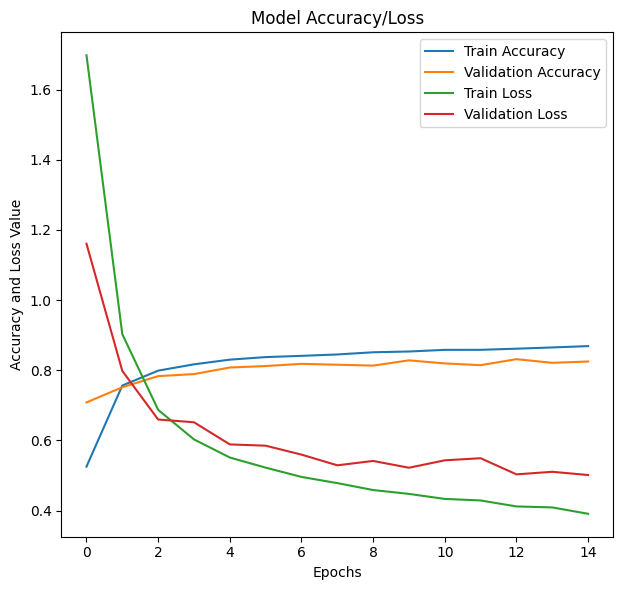

In [ ]:
# Plot accuracy and loss curves
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    # plt.title('Accuracy')
    # plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    # plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Accuracy/Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


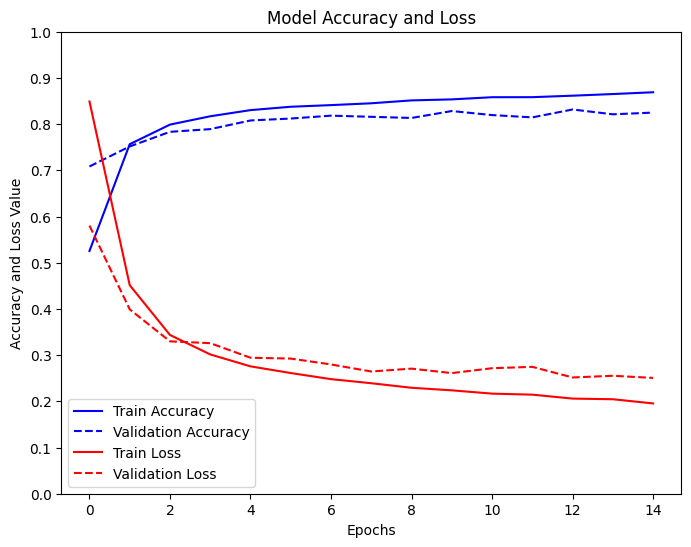

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_history_without_scaling_label(history, loss_scale_factor=1):
    # Create a single plot for both Accuracy and Scaled Loss
    plt.figure(figsize=(8, 6))

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', linestyle='--')

    # Scale the loss values
    scaled_train_loss = [loss * loss_scale_factor for loss in history.history['loss']]
    scaled_val_loss = [loss * loss_scale_factor for loss in history.history['val_loss']]

    # Plot scaled loss without mentioning the scaling factor
    plt.plot(scaled_train_loss, label='Train Loss', color='red')
    plt.plot(scaled_val_loss, label='Validation Loss', color='red', linestyle='--')

    # Add title, labels, and legend
    plt.title('Model Accuracy and Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss Value')
    plt.legend()

    # Adjust y-axis ticks
    plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1.0 in steps of 0.1

    # Display the plot
    plt.show()

# Call the function without showing "scaled by 0.5"
plot_training_history_without_scaling_label(history, loss_scale_factor=0.5)


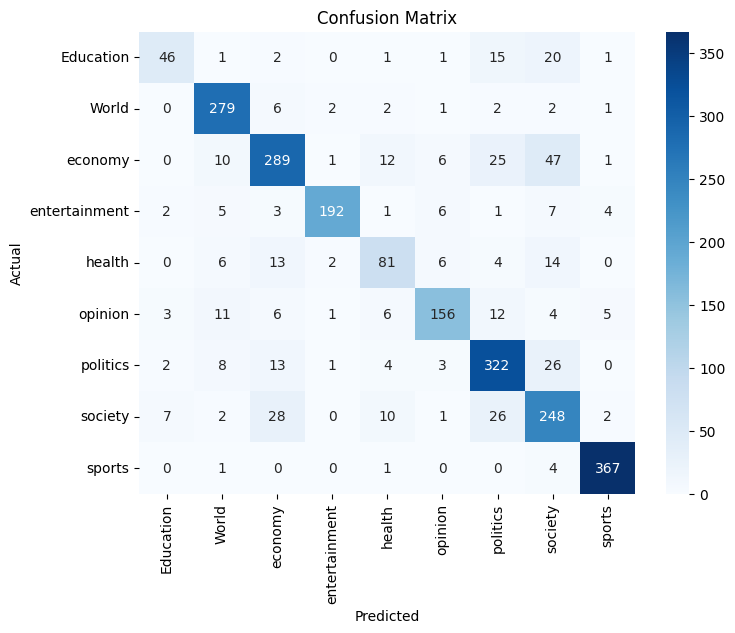

               precision    recall  f1-score   support

    Education       0.77      0.53      0.63        87
        World       0.86      0.95      0.90       295
      economy       0.80      0.74      0.77       391
entertainment       0.96      0.87      0.91       221
       health       0.69      0.64      0.66       126
      opinion       0.87      0.76      0.81       204
     politics       0.79      0.85      0.82       379
      society       0.67      0.77      0.71       324
       sports       0.96      0.98      0.97       373

     accuracy                           0.82      2400
    macro avg       0.82      0.79      0.80      2400
 weighted avg       0.83      0.82      0.82      2400



In [ ]:
# Predictions and true labels
# y_pred = model.predict(test_dataset)
# y_pred_labels = np.argmax(y_pred, axis=1)

# Get unique labels in y_test and y_pred_labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_labels)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_[unique_labels].astype(str), # Use unique labels for target names
            yticklabels=label_encoder.classes_[unique_labels].astype(str))  # Use unique labels for target names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_[unique_labels].astype(str), labels=unique_labels)) # Add labels argument

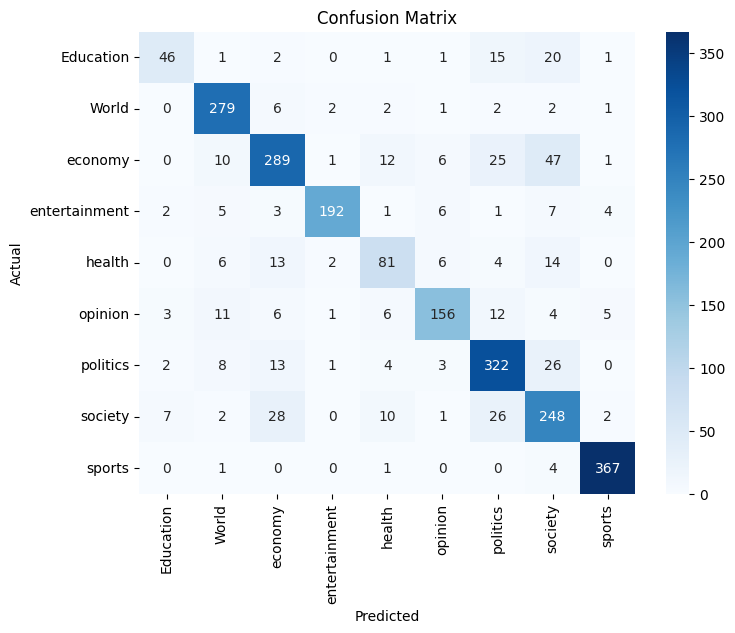

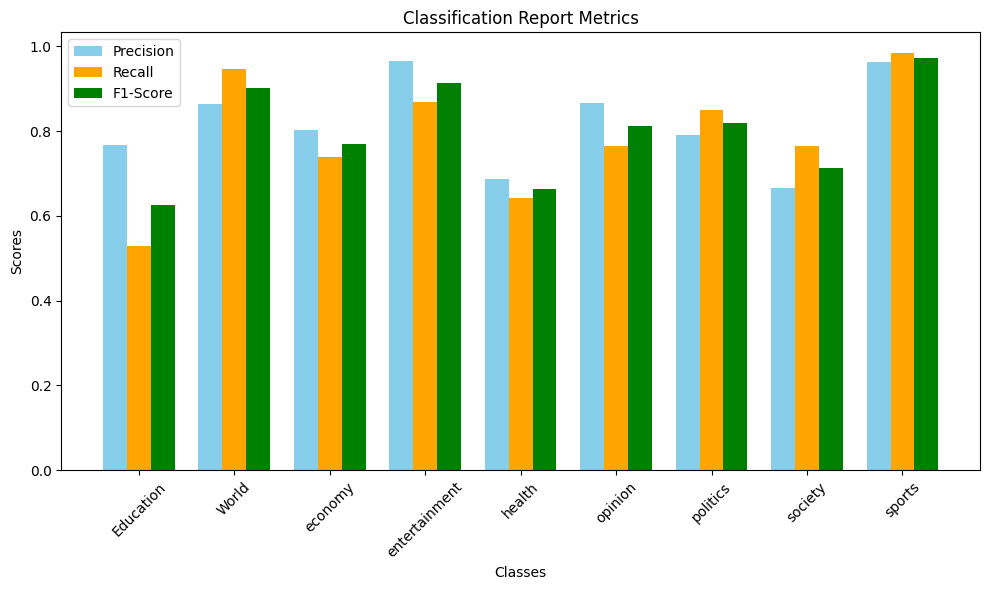

               precision    recall  f1-score   support

    Education       0.77      0.53      0.63        87
        World       0.86      0.95      0.90       295
      economy       0.80      0.74      0.77       391
entertainment       0.96      0.87      0.91       221
       health       0.69      0.64      0.66       126
      opinion       0.87      0.76      0.81       204
     politics       0.79      0.85      0.82       379
      society       0.67      0.77      0.71       324
       sports       0.96      0.98      0.97       373

     accuracy                           0.82      2400
    macro avg       0.82      0.79      0.80      2400
 weighted avg       0.83      0.82      0.82      2400



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predictions and true labels
# y_pred = model.predict(test_dataset)
# y_pred_labels = np.argmax(y_pred, axis=1)

# Get unique labels in y_test and y_pred_labels
unique_labels = np.unique(np.concatenate((y_test, y_pred_labels)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels, labels=unique_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues',
            xticklabels=label_encoder.classes_[unique_labels].astype(str), # Use unique labels for target names
            yticklabels=label_encoder.classes_[unique_labels].astype(str))  # Use unique labels for target names
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(
    y_test, y_pred_labels,
    target_names=label_encoder.classes_[unique_labels].astype(str),
    labels=unique_labels,
    output_dict=True  # Get the report as a dictionary
)

# Extract metrics for each class
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[cls]['precision'] for cls in class_names]
recall = [report[cls]['recall'] for cls in class_names]
f1_score = [report[cls]['f1-score'] for cls in class_names]

# Create a bar plot for Precision, Recall, and F1-Score
x = np.arange(len(class_names))  # Label positions
width = 0.25  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='orange')
plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print the classification report
print(classification_report(
    y_test, y_pred_labels,
    target_names=label_encoder.classes_[unique_labels].astype(str),
    labels=unique_labels
))


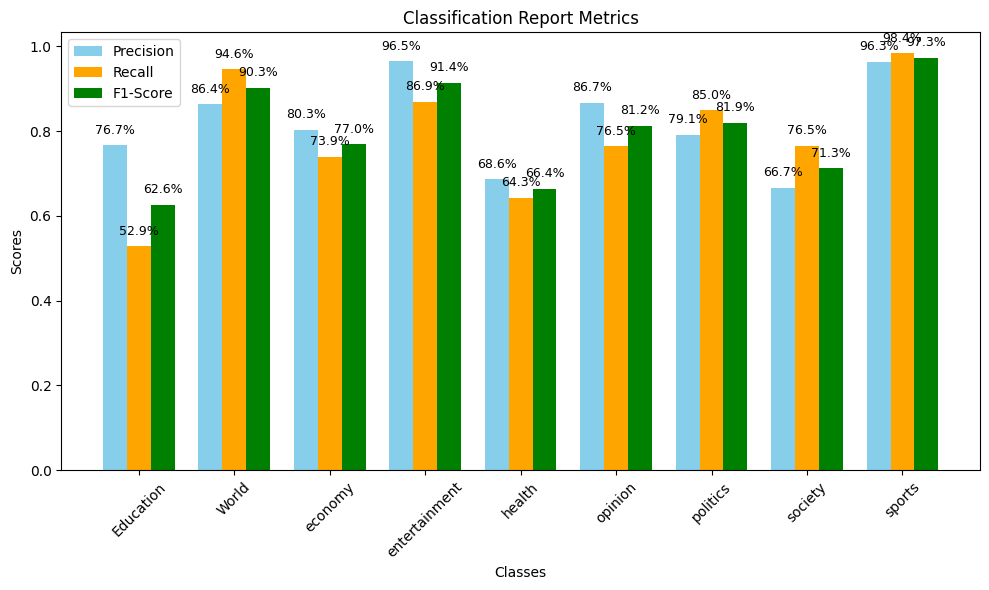

In [ ]:
# Create a bar plot for Precision, Recall, and F1-Score
x = np.arange(len(class_names))  # Label positions
width = 0.25  # Bar width

plt.figure(figsize=(10, 6))
precision_bars = plt.bar(x - width, precision, width, label='Precision', color='skyblue')
recall_bars = plt.bar(x, recall, width, label='Recall', color='orange')
f1_score_bars = plt.bar(x + width, f1_score, width, label='F1-Score', color='green')

# Add percentages on top of each bar
for bars, metric in zip([precision_bars, recall_bars, f1_score_bars], [precision, recall, f1_score]):
    for bar, value in zip(bars, metric):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,  # Position: center and slightly above the bar
                 f'{value:.1%}', ha='center', va='bottom', fontsize=9)  # Format as percentage

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


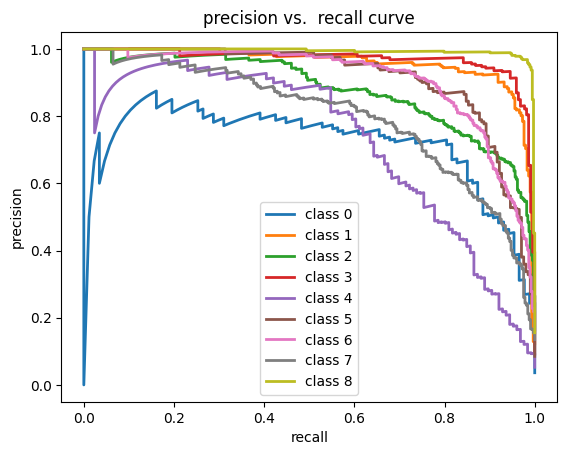

In [ ]:
# Precision-Recall Curve for Multiclass Classification

# Iterate over each class
precision = dict()
recall = dict()
for i in range(num_classes): # num_classes is the number of classes in your dataset
    # Convert y_test to a NumPy array to ensure element-wise comparison
    y_test_array = np.array(y_test)
    precision[i], recall[i], _ = precision_recall_curve((y_test_array == i).astype(int), y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs.  recall curve")
plt.show()

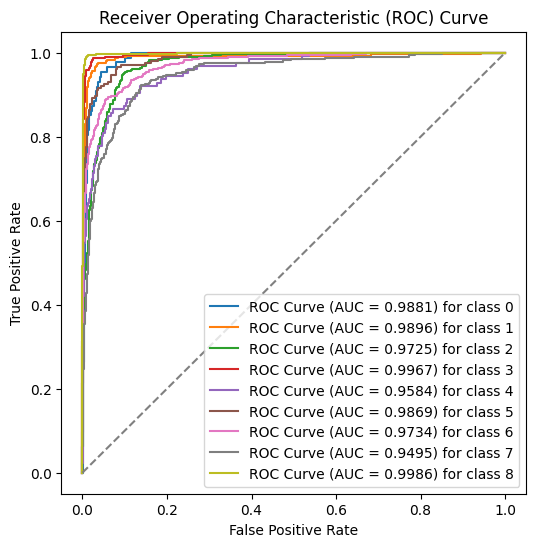

In [ ]:
# ROC Curve for multiclass classification

# Binarize the output
y_test_binary = label_binarize(y_test, classes=range(num_classes)) # Change here

# Iterate over each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(6, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=plt.cm.tab10(i),
             label=f'ROC Curve (AUC = {roc_auc[i]:.4f}) for class {i}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()